In [1]:
from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import numpy as np

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [2]:
val_samples = y.shape[0] * 0
train_test_samples = y.shape[0] * 1
kf = KFold(n_splits=4)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

#X_train_test, X_val, y_train_test, y_val = train_test_split( X, y, train_size=int(train_test_samples), test_size=int(val_samples))
X_train_test = X
y_train_test = y


names = [
    "Logistic Regression",
    "Nearest Neighbors",
    "SVM",
    "Decision Tree",
]

classifiers = [
    LogisticRegression(C=50.0 / train_test_samples, penalty="l1", solver="saga", tol=0.1),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5),
]

scaler = StandardScaler()

print("Train_test: ", train_test_samples)
print("Val: ", val_samples)

Train_test:  70000
Val:  0


2 класса
линейный свм (без кернел)
решающие признаки на дереве вывод
макс качество свм 0,95+

l1 and l2
опорные вектора svm
task найти опорные вектора по обуч. свм и выборке

In [11]:
for i, clf in enumerate(classifiers): #l1 and l2
    accuracys = []
    for train_index, test_index in kf.split(X_train_test):
        X_train, X_test = X_train_test[train_index], X_train_test[test_index]
        y_train, y_test = y_train_test[train_index], y_train_test[test_index]
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        clf.random_state = 42
        clf.fit(X_train, y_train)
        accuracys.append(accuracy_score(y_test, clf.predict(X_test)))
    print("Test accuracy of ", names[i]," is:  %.3f" % np.mean(np.asarray(accuracys)))

Test accuracy of  Logistic Regression  is:  0.819
Test accuracy of  Nearest Neighbors  is:  0.944
Test accuracy of  Linear SVM  is:  0.939
Test accuracy of  Decision Tree  is:  0.663


In [9]:
print(classifiers[2]._get_coef)

<bound method BaseSVC._get_coef of SVC(C=0.025, kernel='linear')>


Full mnist accuracy
Test accuracy of  Logistic Regression  is:  0.819
Test accuracy of  Nearest Neighbors  is:  0.944
Test accuracy of  Linear SVM  is:  0.939
Test accuracy of  Decision Tree  is:  0.663

Additional Tasks:

Maximum Accuracy

In [16]:
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), Normalizer(), PCA(n_components=64, random_state=0), SVC())
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)

0.9768571428571429

2 Labels and support vectors

In [13]:
X_local = X[np.logical_or(y == '1', y == '7')]
y_local = y[np.logical_or(y == '1', y == '7')]

print(len(y_local))

model = SVC(kernel="linear", C=1)
model.fit(X_local, y_local)
accuracy_score(y_local, model.predict(X_local))

15170


1.0

(186, 784)


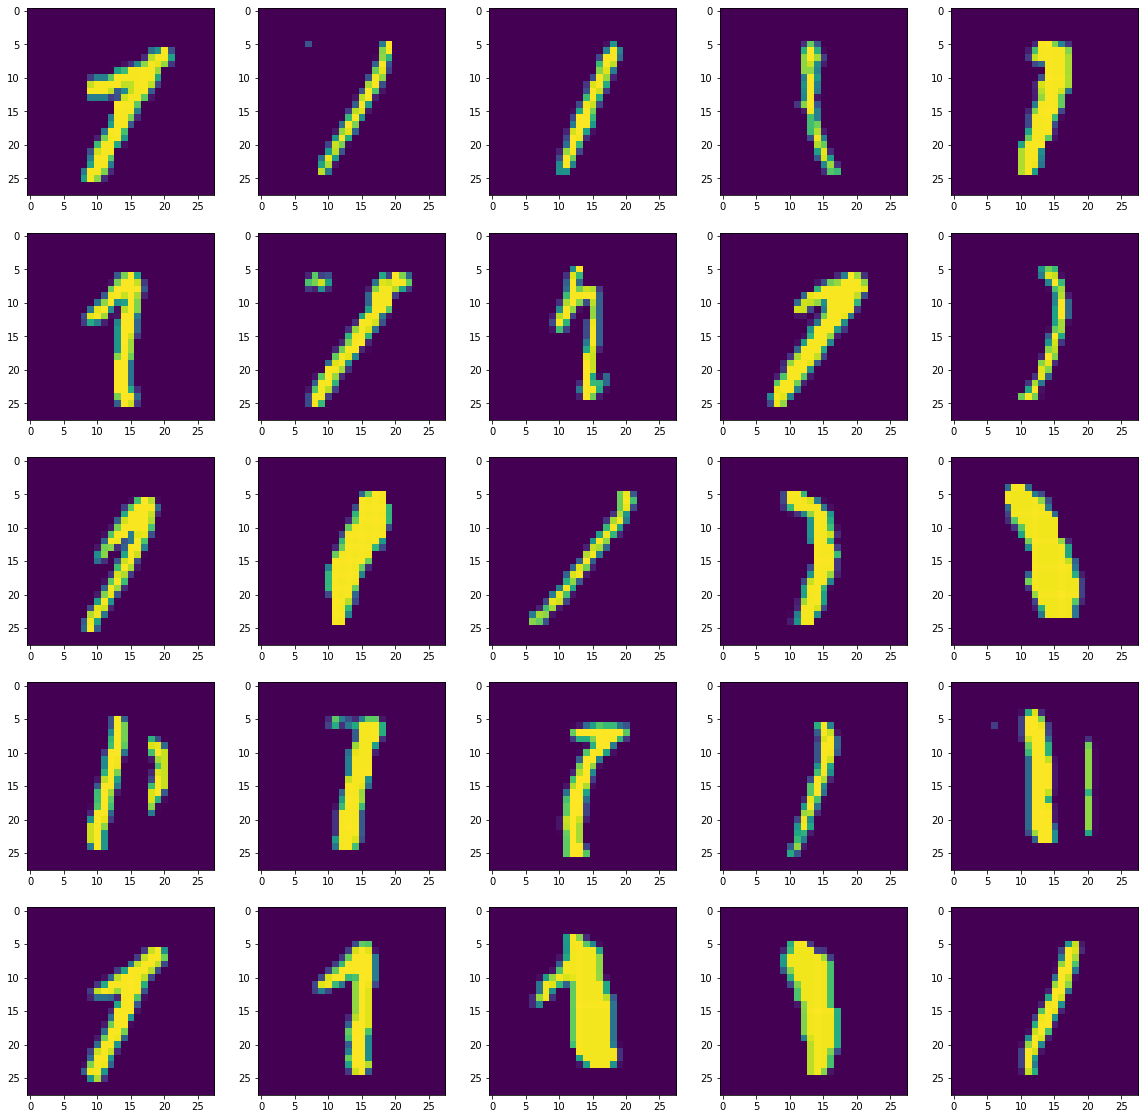

In [32]:
import matplotlib.pyplot as plt
print(model.support_vectors_.shape)

plt.figure(figsize=(20,20))
for i in range(25): 
    plt.subplot(5,5,i+1)
    plt.imshow(model.support_vectors_[i].reshape(28,28))


Decision trees important features

In [5]:
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = DecisionTreeClassifier(max_depth=5)
model.fit(X, y)

DecisionTreeClassifier(max_depth=5)

[Text(167.4, 199.32, 'X[350] <= 126.5\ngini = 0.9\nsamples = 70000\nvalue = [6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825\n6958]'),
 Text(83.7, 163.07999999999998, 'X[435] <= 0.5\ngini = 0.88\nsamples = 45149\nvalue = [6347, 657, 5544, 1438, 6209, 3714, 5512, 6692, 3504\n5532]'),
 Text(41.85, 126.83999999999999, 'X[597] <= 1.5\ngini = 0.692\nsamples = 11990\nvalue = [6181, 42, 747, 318, 502, 1086, 662, 1823, 141, 488]'),
 Text(20.925, 90.6, 'X[486] <= 0.5\ngini = 0.785\nsamples = 4478\nvalue = [535, 25, 152, 109, 490, 464, 419, 1774, 48, 462]'),
 Text(10.4625, 54.359999999999985, 'X[404] <= 0.5\ngini = 0.59\nsamples = 2740\nvalue = [218, 24, 51, 84, 106, 267, 46, 1699, 19, 226]'),
 Text(5.23125, 18.119999999999976, 'gini = 0.363\nsamples = 2114\nvalue = [196, 3, 43, 27, 29, 77, 20, 1672, 4, 43]'),
 Text(15.693750000000001, 18.119999999999976, 'gini = 0.792\nsamples = 626\nvalue = [22, 21, 8, 57, 77, 190, 26, 27, 15, 183]'),
 Text(31.387500000000003, 54.359999999999985, 'X[571] 

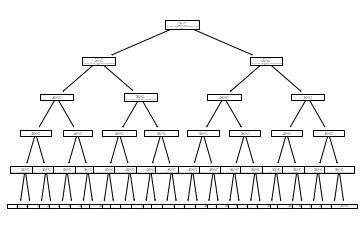

In [6]:
tree.plot_tree(model)

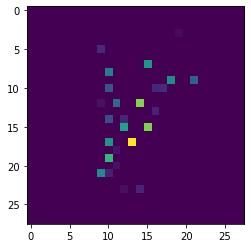

In [11]:
import matplotlib.pyplot as plt
plt.imshow(model.feature_importances_.reshape(28,28))

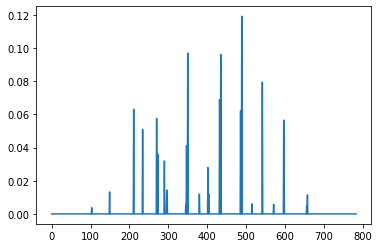

In [12]:
plt.plot(model.feature_importances_)

Второй заход


LogReg + l1 + (x30, x1/30)

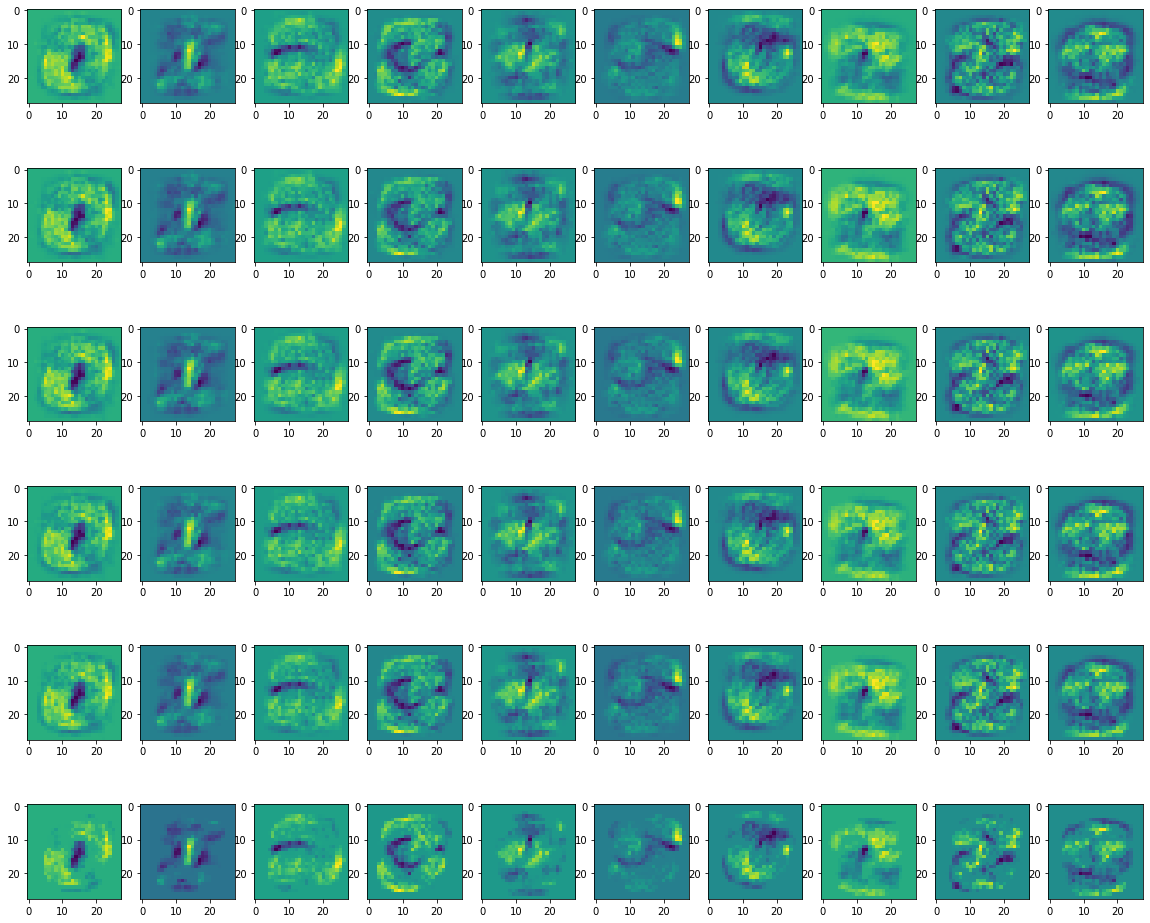

In [14]:
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
plt.figure(figsize=(20,20))
for i in range(0,6):
    model = LogisticRegression(C=50.0 * pow(10,-i), penalty="l1", solver="saga", tol=0.1)
    model.fit(X_train, y_train)
    for j in range(10):
        plt.subplot(7,10,i*10+j+1)
        plt.imshow(model.coef_[j].reshape(28,28))

Опорные вектора (честно)

In [18]:
X_local = X[np.logical_or(y == '1', y == '7')]
y_local = y[np.logical_or(y == '1', y == '7')]

model = SVC(kernel="linear", C=1)
model.fit(X_local, y_local)

SVC(C=1, kernel='linear')

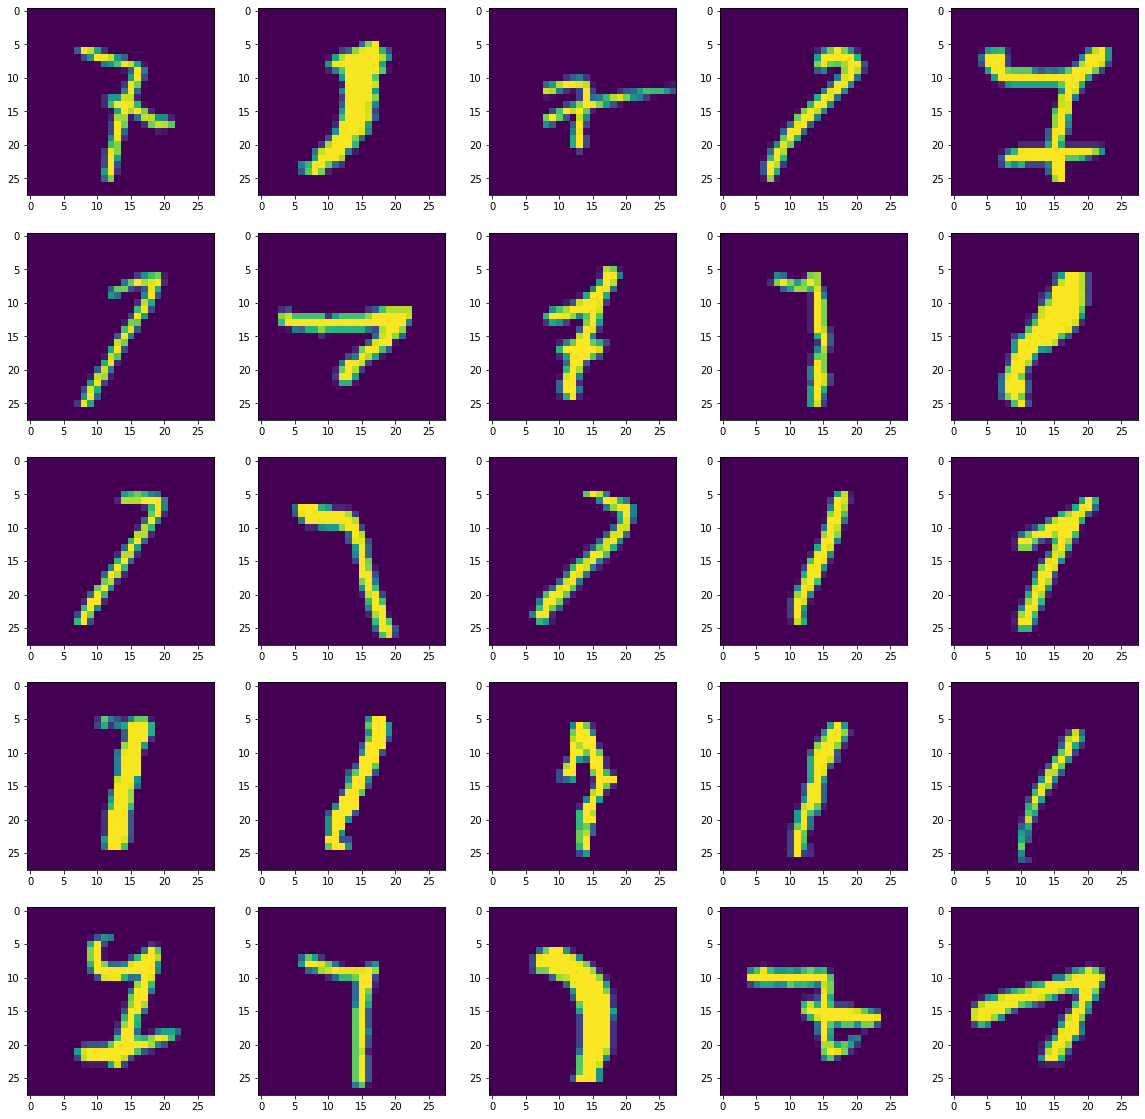

In [22]:
decision_function = model.decision_function(X_local)
support_vector_indices = np.where(
    np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X_local[support_vector_indices]
plt.figure(figsize=(20,20))
for i in range(25): 
    plt.subplot(5,5,i+1)
    plt.imshow(support_vectors[i].reshape(28,28))

MNISt * 256

In [33]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.8, test_size=0.2)

In [34]:
acc_orig = []
for i in range(10): 
    model = LogisticRegression(C=50.0 / train_test_samples, penalty="l1", solver="saga", tol=0.1)
    model.fit(X_train, y_train)
    acc_orig.append(accuracy_score(y_test, model.predict(X_test)))

In [35]:
X_train *= 256
X_test *= 256

In [36]:
acc_scaled = []
for i in range(10): 
    model = LogisticRegression(C=50.0 / train_test_samples, penalty="l1", solver="saga", tol=0.1)
    model.fit(X_train, y_train)
    acc_scaled.append(accuracy_score(y_test, model.predict(X_test)))

In [37]:
print("original:", np.mean(np.array(acc_orig)), "scaled:", np.mean(np.array(acc_scaled)))

original: 0.9187857142857142 scaled: 0.9207142857142857
